In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_openml

#Loading and preprocessing of the dataset

Importing the mnist data set

In [ ]:
mnist = fetch_openml("mnist_784", version=1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [13]:
X = mnist["data"]
y = mnist["target"]
print(X.shape)
X.head()

(70000, 784)


,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Converting to array for matrix operations

In [14]:
X = np.array(X)
y = np.array(y)

Splitting the dataset

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
X_train, X_test, y_train, y_test = X_train.T/255, X_test.T/255, y_train.T, y_test.T

In [16]:
m = X_train.shape[1]

#Neural Network From Scratch

Initailzing Weights and Biasis

In [24]:
def params():
  W1 = np.random.randn(10, 784) * np.sqrt(2 / 784)
  b1 = np.zeros((10, 1))
  W2 = np.random.randn(10, 10) * np.sqrt(2 / 10)
  b2 = np.zeros((10, 1))
  return W1, b1, W2, b2

Forward Propogation

In [17]:
def Relu(Z):
  return  np.maximum(0, Z)

def softmax(Z):
    exp_Z = np.exp(Z - np.max(Z, axis=0, keepdims=True)) #Normalization of data
    return exp_Z / np.sum(exp_Z, axis=0, keepdims=True)

def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = Relu(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

One hot Encoding the Labels

In [30]:
y_train = y_train.astype(int)
y_test = y_test.astype(int)
one_hot_y = np.zeros((10, y_train.size))
one_hot_y[y_train, np.arange(y_train.size)] = 1

Backward Propagation

In [20]:
def back_prop(Z1, A1, Z2, A2, W2):
  dZ2 = A2 - one_hot_y
  dW2 = 1 / m * dZ2.dot(A1.T)
  db2 = 1 / m * np.sum(dZ2)
  dZ1 = W2.T.dot(dZ2) * (Z1 > 0)
  dW1 = 1 / m * dZ1.dot(X_train.T)
  db1 = 1 / m * np.sum(dZ1)
  return dW1, db1, dW2, db2

Applying Gradient Descent to update the parameters

In [21]:
def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
  W1 = W1 - alpha * dW1
  b1 = b1 - alpha * db1
  W2 = W2 - alpha * dW2
  b2 = b2 - alpha * db2
  return W1, b1, W2, b2

Iterating through the data set and updating the parameters


In [22]:
def get_accuracy(predictions, y):
  print(predictions, y)
  return np.sum(predictions == y) / y.size

def gradient_descent(X, y, its, alpha):
  W1, b1, W2, b2 = params()
  for i in range(its):
    Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X_train)
    dW1, db1, dW2, db2 = back_prop(Z1, A1, Z2, A2, W2)
    W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
    if i % 50 == 0:
      print("Iteration: ", i)
      print("Accuracy: ", get_accuracy(np.argmax(A2, 0),y))
  return W1, b1, W2, b2

In [25]:
W1, b1, W2, b2 = gradient_descent(X_train, y_train, 500, 0.1)

Iteration:  0
[7 7 1 ... 1 5 5] [4 9 6 ... 7 1 1]
Accuracy:  0.07144642857142858
Iteration:  50
[4 7 6 ... 7 1 2] [4 9 6 ... 7 1 1]
Accuracy:  0.7606607142857142
Iteration:  100
[4 7 6 ... 7 1 8] [4 9 6 ... 7 1 1]
Accuracy:  0.8371428571428572
Iteration:  150
[4 7 6 ... 7 1 1] [4 9 6 ... 7 1 1]
Accuracy:  0.86475
Iteration:  200
[4 7 6 ... 7 1 1] [4 9 6 ... 7 1 1]
Accuracy:  0.878875
Iteration:  250
[4 7 6 ... 7 1 1] [4 9 6 ... 7 1 1]
Accuracy:  0.8871071428571429
Iteration:  300
[4 9 6 ... 7 1 1] [4 9 6 ... 7 1 1]
Accuracy:  0.8935
Iteration:  350
[4 9 6 ... 7 1 1] [4 9 6 ... 7 1 1]
Accuracy:  0.8986785714285714
Iteration:  400
[4 9 6 ... 7 1 1] [4 9 6 ... 7 1 1]
Accuracy:  0.9021785714285714
Iteration:  450
[4 9 6 ... 7 1 1] [4 9 6 ... 7 1 1]
Accuracy:  0.9052857142857142


# Making Predictions and getting Accuracy

[0 4 1 ... 7 4 6] [0 4 1 ... 7 4 6]
Accuracy: 89.84%


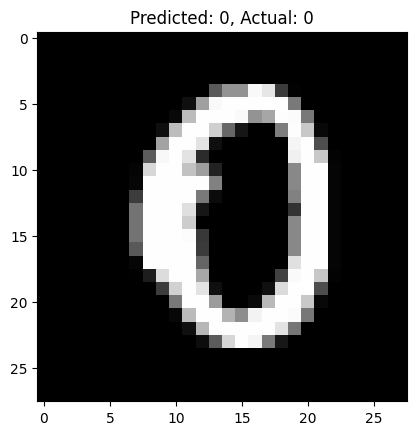

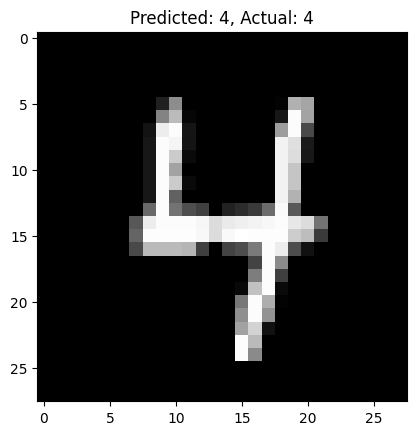

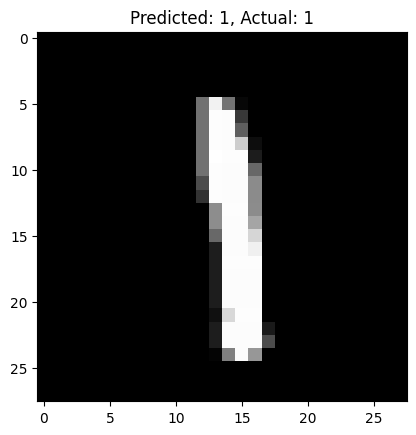

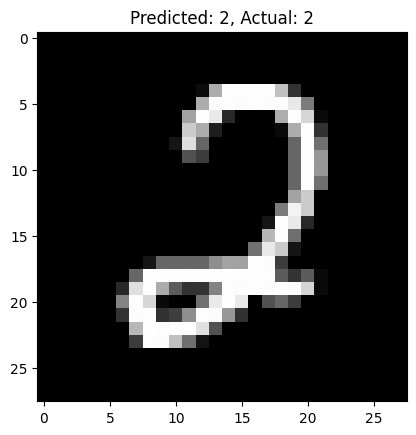

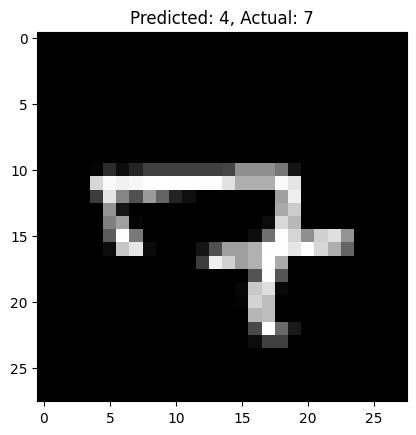

In [34]:
def make_preds(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = np.argmax(A2, 0)  # Get the number with the highest probability
    return predictions

y_pred = make_preds(X_test, W1, b1, W2, b2)
accuracy = get_accuracy(y_pred, y_test)
print(f"Accuracy: {accuracy * 100:.2f}%")

for i in range(5):  # Display the first 5 test images
    plt.imshow(X_test[:, i].reshape(28, 28), cmap='gray')
    plt.title(f"Predicted: {y_pred[i]}, Actual: {y_test[i]}")
    plt.show()
